The average regret for the ETC algorithm is 7.45865659295252


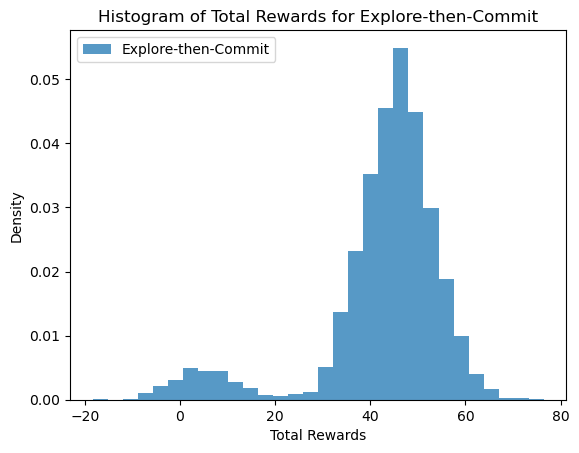

The average regret for the UCB algorithm is 5.375948298197612


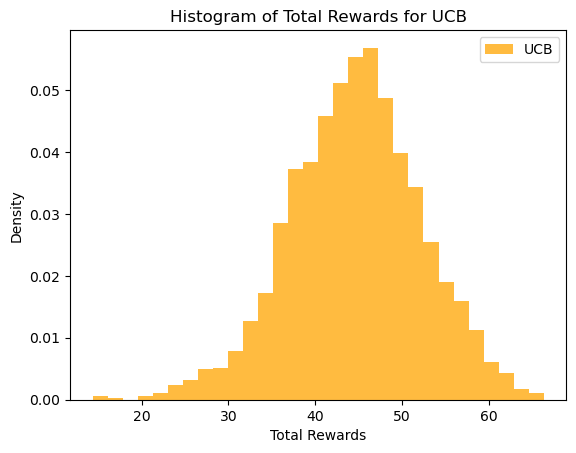

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
B = 2000  # Number of simulations
n = 50  # Number of rounds
K = 2  # Number of arms
c = 4  # Initial pulls per arm

mu_star = 1  # Mean of the best arm
np.random.seed(42)  # For reproducibility

# Function to simulate Explore-then-Commit algorithm
def simulate_ETC(B, n, K, c):
    total_rewards = []  # To store total reward for each simulation
    for _ in range(B):
        rewards = np.zeros(K)  # Sum of rewards for each arm
        counts = np.zeros(K)  # Counts of pulls for each arm
        
        # Exploration phase
        for t in range(1, c*K + 1):
            arm = (t % K)  # Choose arm
            reward = np.random.normal(arm, 1)  # Get reward
            rewards[arm] += reward
            counts[arm] += 1
        
        # Commit phase
        best_arm = np.argmax(rewards / counts)  # Find best arm based on exploration
        commit_rewards = np.random.normal(best_arm, 1, n - c*K)  # Rewards after committing
        total_rewards.append(np.sum(rewards) + np.sum(commit_rewards))  # Total reward for this simulation
    
    return total_rewards

#Function to simulate UCB algorithm
def simulate_UCB(B, n, K, c):
    total_rewards = []  # To store total reward for each simulation
    for _ in range(B):
        rewards = np.zeros(K)  # Sum of rewards for each arm
        counts = np.zeros(K)  # Counts of pulls for each arm

        # Initial pulls
        for t in range(1, c*K + 1):
            arm = (t % K)  # Choose arm
            reward = np.random.normal(arm, 1)  # Get reward
            rewards[arm] += reward
            counts[arm] += 1
        
        # UCB phase
        for t in range(c*K, n):
            ucb_values = rewards / counts + np.sqrt(2 * np.log(20) / counts)
            arm = np.argmax(ucb_values)  # Choose arm with highest UCB
            reward = np.random.normal(arm, 1)  # Get reward
            rewards[arm] += reward
            counts[arm] += 1
        
        total_rewards.append(np.sum(rewards))  # Total reward for this simulation
    
    return total_rewards

# Simulate Explore-then-Commit
total_rewards_ETC = simulate_ETC(B, n, K, c)
# Calculate empirical averaged regret for Explore-then-Commit
average_regret_ETC = np.mean(50 * mu_star - np.array(total_rewards_ETC))
print(f"The average regret for the ETC algorithm is {average_regret_ETC}")


# Plot histogram for Explore-then-Commit
plt.hist(total_rewards_ETC, bins=30, density=True, alpha=0.75, label='Explore-then-Commit')
plt.xlabel('Total Rewards')
plt.ylabel('Density')
plt.title('Histogram of Total Rewards for Explore-then-Commit')
plt.legend()
plt.show()

# Simulate UCB
total_rewards_UCB = simulate_UCB(B, n, K, c)
# Calculate empirical averaged regret for UCB
average_regret_UCB = np.mean(50 * mu_star - np.array(total_rewards_UCB))
print(f"The average regret for the UCB algorithm is {average_regret_UCB}")
# Plot histogram for UCB
plt.hist(total_rewards_UCB, bins=30, density=True, alpha=0.75, color='orange', label='UCB')
plt.xlabel('Total Rewards')
plt.ylabel('Density')
plt.title('Histogram of Total Rewards for UCB')
plt.legend()
plt.show()

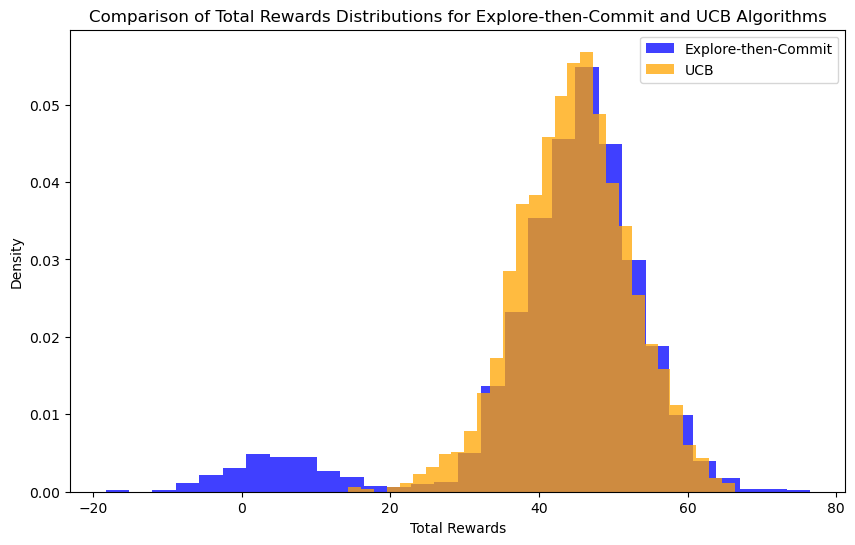

From the plots we can see that the Explore-then-commit strategy committed to the wrong arm far more than UCB.
It would be interesting to compare the algorithms with a different value for c.


In [2]:
# Plotting both histograms on the same plot for comparison
plt.figure(figsize=(10, 6))
plt.hist(total_rewards_ETC, bins=30, alpha=0.75, label='Explore-then-Commit', density=True, color='blue')
plt.hist(total_rewards_UCB, bins=30, alpha=0.75, label='UCB', density=True, color='orange')
plt.xlabel('Total Rewards')
plt.ylabel('Density')
plt.title('Comparison of Total Rewards Distributions for Explore-then-Commit and UCB Algorithms')
plt.legend()
plt.show()

print('''From the plots we can see that the Explore-then-commit strategy committed to the wrong arm far more than UCB.
It would be interesting to compare the algorithms with a different value for c.''')